# Multi-Layer- Perceptron Algorithm

## Load the Data

In [30]:
import pandas as pd
import ast

# Load training data
train_data = pd.read_csv('train_data.csv')
X_train_raw = train_data['X_train'].tolist()
y_train_raw = train_data['y_train'].tolist()

# Load test data
test_data = pd.read_csv('test_data.csv')
X_test_raw = test_data['X_test'].tolist()
y_test_raw = test_data['y_test'].tolist()

#Make it a list
X_train_raw = [ast.literal_eval(item) if isinstance(item, str) else item for item in X_train_raw]
X_test_raw = [ast.literal_eval(item) if isinstance(item, str) else item for item in X_test_raw]



## Vectorize your data and Encode Labels

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer


# Join into one big string
corpus_train = [' '.join(item) for item in X_train_raw]
corpus_test = [' '.join(item) for item in X_test_raw]


# # Initialize a TF-IDF Vectorizer
# vectorizer = TfidfVectorizer(max_features=1000)
# X_train = vectorizer.fit_transform(corpus_train).toarray()
# X_test = vectorizer.fit_transform(corpus_test).toarray()


# Initialize the CountVectorizer, limiting max_features to the top 1000 words.
vectorizer = CountVectorizer(max_features=1000) 

# Fit the vectorizer on train and test data. Transform the data into BoW matrices.
X_train = vectorizer.fit_transform(corpus_train).toarray()
X_test = vectorizer.transform(corpus_test).toarray()

# Encode the taget variables
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train_raw)
y_test = encoder.fit_transform(y_test_raw)


In [32]:
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, BatchNormalization
from sklearn.metrics import classification_report, accuracy_score
from keras.regularizers import l2


model_1 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(512, activation='relu', kernel_regularizer = l2(0.001)),
    Dense(256, activation='relu', kernel_regularizer = l2(0.001)),
    Dense(128, activation='relu', kernel_regularizer = l2(0.001)),
    Dense(64, activation='relu', kernel_regularizer = l2(0.001)),
    Dense(len(set(y_train)), activation='softmax')
])

model_2 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(512, activation='relu', kernel_regularizer = l2(0.001)),
    Dense(256, activation='relu', kernel_regularizer = l2(0.001)),
    Dense(len(set(y_train)), activation='softmax')
])

model_3 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(512, activation='relu', kernel_regularizer = l2(0.001)),
    Dense(256, activation='relu', kernel_regularizer = l2(0.001)),
    Dense(128, activation='relu', kernel_regularizer = l2(0.001)),
    Dense(64, activation='relu', kernel_regularizer = l2(0.001)),
    Dense(len(set(y_train)), activation='softmax')
])

# Compile the model
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])


# Train the model
history_1 = model_1.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
history_2 = model_2.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
history_3 = model_3.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)



Epoch 1/10
8337/8337 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.8019 - loss: 0.7962 - val_accuracy: 0.8586 - val_loss: 0.4790
Epoch 2/10
8337/8337 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.8610 - loss: 0.4609 - val_accuracy: 0.8599 - val_loss: 0.4375
Epoch 3/10
8337/8337 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.8616 - loss: 0.4321 - val_accuracy: 0.8639 - val_loss: 0.4206
Epoch 4/10
8337/8337 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.8627 - loss: 0.4188 - val_accuracy: 0.8611 - val_loss: 0.4147
Epoch 5/10
8337/8337 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.8638 - loss: 0.4088 - val_accuracy: 0.8591 - val_loss: 0.4152
Epoch 6/10
1214/8337 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - accuracy: 0.8628 - loss: 0.3985

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

# Evaluate the model on the test data
loss_model_1 = model_1.evaluate(X_test, y_test)
loss_model_2 = model_2.evaluate(X_test, y_test)
loss_model_3 = model_3.evaluate(X_test, y_test)


# # Predict classes
y_pred_1 = model_1.predict(X_test, batch_size=32)
y_pred_2 = model_2.predict(X_test, batch_size=32)
y_pred_3 = model_3.predict(X_test, batch_size=32)

# Transform into a numpy array 
y_pred_classes_1 = np.argmax(y_pred_1, axis=1)
y_pred_classes_2 = np.argmax(y_pred_2, axis=1)
y_pred_classes_3 = np.argmax(y_pred_3, axis=1)

# Get the accuracy
accuracy_model_1 = accuracy_score(y_test, y_pred_classes_1)
accuracy_model_2 = accuracy_score(y_test, y_pred_classes_2)
accuracy_model_3 = accuracy_score(y_test, y_pred_classes_3)

# Print the accuracy 
print(f'Test Accuracy: {accuracy_model_1*100:.2f}%')
print(f'Test Accuracy: {accuracy_model_2*100:.2f}%')
print(f'Test Accuracy: {accuracy_model_3*100:.2f}%')

# # Print classification report
print('Model 1 Classification Report')
print(classification_report(y_test, y_pred_classes_1))

print('\nModel 2 Classification Report')
print(classification_report(y_test, y_pred_classes_2))

print('\nModel 3 Classification Report')
print(classification_report(y_test, y_pred_classes_3))


2606/2606 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8503 - loss: 0.7417
2606/2606 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8627 - loss: 0.3657
2606/2606 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8626 - loss: 0.3810
2606/2606 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2606/2606 ━━━━━━━━━━━━━━━━━━━━ 2s 921us/step
2606/2606 ━━━━━━━━━━━━━━━━━━━━ 2s 802us/step
Test Accuracy: 84.87%
Test Accuracy: 86.06%
Test Accuracy: 86.17%
Model 1 Classification Report
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     24249
           1       0.90      0.86      0.88     28191
           2       0.68      0.85      0.76      6980
           3       0.84      0.80      0.82     11449
           4       0.79      0.76      0.78      9532
           5       0.67      0.71      0.69      2961

    accuracy                           0.85     83362
   macro avg       0.80      0.82      0.80     83362
weighted avg       0.85      0.85      0.85     8336

## Display the Loss

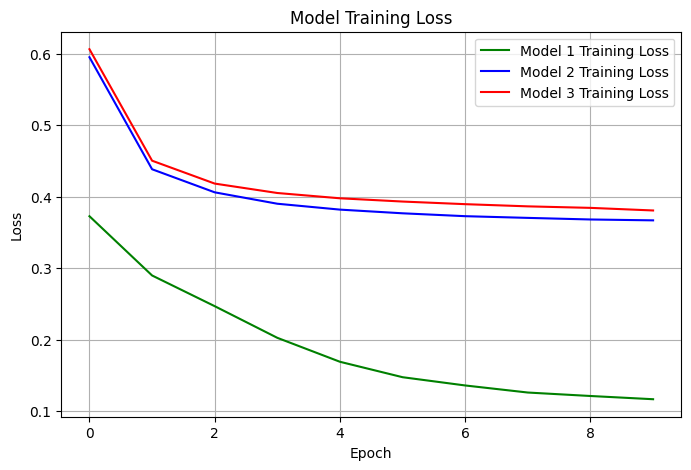

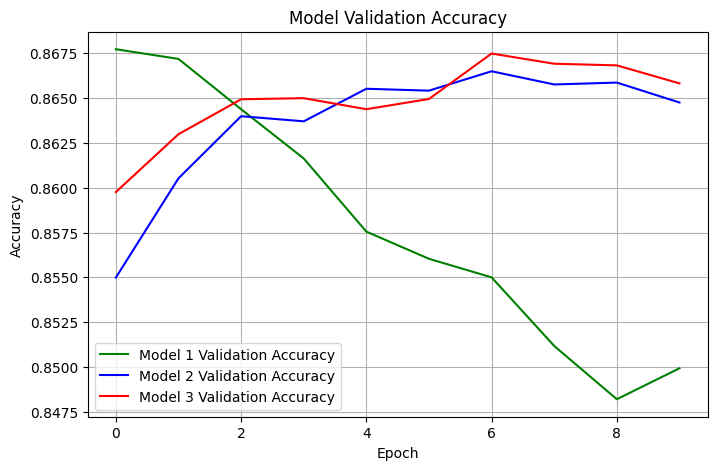

In [ ]:
import matplotlib.pyplot as plt

# Plotting validation loss
plt.figure(figsize=(8, 5))
plt.plot(history_1.history['loss'], label='Model 1 Training Loss', color='green')
plt.plot(history_2.history['loss'], label='Model 2 Training Loss' ,color='blue')
plt.plot(history_3.history['loss'], label='Model 3 Training Loss', color='red')
plt.title('Model Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()

# Plotting validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history_1.history['val_accuracy'], label='Model 1 Validation Accuracy', color='green')
plt.plot(history_2.history['val_accuracy'], label='Model 2 Validation Accuracy', color='blue')
plt.plot(history_3.history['val_accuracy'], label='Model 3 Validation Accuracy', color='red')
plt.title('Model Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

## Compare the Models Against the Baseline

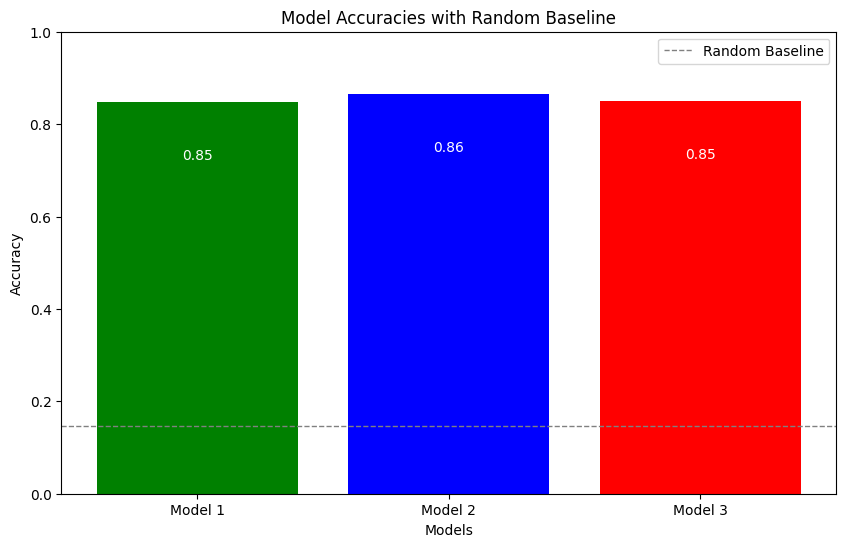

In [ ]:

# Random Baseline Calculated by picking a random class
random_baseline = 0.1458


model_names = ['Model 1', 'Model 2', 'Model 3']
accuracies = [accuracy_model_1, accuracy_model_2, accuracy_model_3]

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=['green', 'blue', 'red'])

# Add the random baseline
plt.axhline(y=random_baseline, color='grey', linestyle='--', linewidth=1, label='Random Baseline')
plt.ylim(0, 1)

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 0.1, f'{yval:.2f}', ha='center', va='top', color='white')

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies with Random Baseline')
plt.legend()
plt.show()

## Model Summaries

In [ ]:

print("Model 1 Summary:")
model_1.summary()


print("\nModel 2 Summary:")
model_2.summary()

print("\nModel 3 Summary:")
model_3.summary()

Model 1 Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       512,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,936,148 (7.39 MB)

 Trainable params: 645,382 (2.46 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,290,766 (4.92 MB)


Model 2 Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │        32,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 6)              │            54 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,700 (385.55 KB)

 Trainable params: 32,862 (128.37 KB)

 Non-trainable params: 112 (448.00 B)

 Optimizer params: 65,726 (256.75 KB)


Model 3 Summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 512)            │       512,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,061,812 (7.87 MB)

 Trainable params: 687,270 (2.62 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,374,542 (5.24 MB)